In [7]:
import pymatgen
import pymatgen.io.xyz
import numpy as np

In [16]:
def detect_automorphisms(filename):
        xyz = pymatgen.io.xyz.XYZ.from_file(filename)
        psa = pymatgen.symmetry.analyzer.PointGroupAnalyzer(xyz.molecule)

        m = xyz.molecule.get_centered_molecule()
        carbons = np.where(np.array(m.atomic_numbers, dtype=np.int) == 6)[0]

        operations = psa.get_symmetry_operations()
        print (carbons)
        mapping = np.zeros((len(carbons), len(operations)), dtype=np.int)
        for opidx, op in enumerate(operations):
                for bidx, base in enumerate(carbons):
                        ds = np.linalg.norm(op.operate(m.cart_coords[base]) - m.cart_coords[carbons], axis=1)
                        onto = np.argmin(ds)
                        if ds[onto] > 1e-3:
                                print (ds[onto])
                                raise ValueError('Irregular geometry')
                        mapping[bidx, opidx] = onto

        return mapping

In [17]:
detect_automorphisms("build_colored_graphs/db-12/inp.xyz")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
0.19437313943526424


ValueError: Irregular geometry

In [18]:
a, b = [[0,1,2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [13,14,15,10,11,12,9,8,7,6,3,4,5,0,1,2,21,20,19,18,17,16]]

In [21]:
for A, B in zip(a, b):
    if A > B:
        print ("if (a[%d] - b[%d] + a[%d] - b[%d]) { return false; }" % (A, A, B, B))

if (a[8] - b[8] + a[7] - b[7]) { return false; }
if (a[9] - b[9] + a[6] - b[6]) { return false; }
if (a[10] - b[10] + a[3] - b[3]) { return false; }
if (a[11] - b[11] + a[4] - b[4]) { return false; }
if (a[12] - b[12] + a[5] - b[5]) { return false; }
if (a[13] - b[13] + a[0] - b[0]) { return false; }
if (a[14] - b[14] + a[1] - b[1]) { return false; }
if (a[15] - b[15] + a[2] - b[2]) { return false; }
if (a[19] - b[19] + a[18] - b[18]) { return false; }
if (a[20] - b[20] + a[17] - b[17]) { return false; }
if (a[21] - b[21] + a[16] - b[16]) { return false; }


In [25]:
'+'.join(["a[%d] - b[%d] " % (i,i) for i in range(22)])

'a[0] - b[0] +a[1] - b[1] +a[2] - b[2] +a[3] - b[3] +a[4] - b[4] +a[5] - b[5] +a[6] - b[6] +a[7] - b[7] +a[8] - b[8] +a[9] - b[9] +a[10] - b[10] +a[11] - b[11] +a[12] - b[12] +a[13] - b[13] +a[14] - b[14] +a[15] - b[15] +a[16] - b[16] +a[17] - b[17] +a[18] - b[18] +a[19] - b[19] +a[20] - b[20] +a[21] - b[21] '

In [26]:
import networkx as nx

In [27]:
g = nx.read_graph6("build_colored_graphs/db-12/out.g6")

In [28]:
g

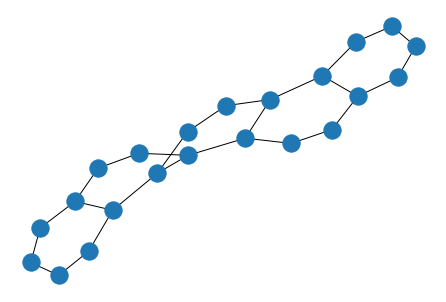

In [32]:
import matplotlib.pyplot as plt
nx.draw_spring(g)

In [33]:
A, B = [[0,1,2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [13,14,15,10,11,12,9,8,7,6,3,4,5,0,1,2,21,20,19,18,17,16]]

In [39]:
lookup = dict(zip(A, B))

In [50]:
lookup[18]

19

In [55]:
q = np.fromfile("/mnt/c/Users/guido/workcopies/apdft/prototyping/networks/build_colored_graphs/db-12/done/result-03", dtype=np.int8).reshape(-1,22)

In [59]:
q[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0],
      dtype=int8)

In [62]:
q = np.loadtxt("/mnt/c/Users/guido/workcopies/apdft/prototyping/networks/build_colored_graphs/db-12/done/result-03.prescan", dtype=np.int)

In [63]:
for a, b in q:
    print (a, b)

0 31
0 38
0 42
1 2
1 17
1 18
1 37
1 40
1 43
1 44
2 17
2 18
2 37
2 40
2 43
2 44
3 19
3 22
3 27
4 5
4 23
4 24
4 29
4 32
4 34
4 35
5 23
5 24
5 29
5 32
5 34
5 35
6 9
6 21
6 26
7 8
7 36
7 41
8 36
8 41
9 21
9 26
11 14
11 15
11 20
12 13
12 28
12 33
13 28
13 33
14 15
14 20
15 20
16 19
16 22
17 18
17 37
17 40
17 43
17 44
18 37
18 40
18 43
18 44
19 25
21 26
22 25
22 27
23 24
23 29
23 32
23 34
23 35
24 29
24 32
24 34
24 35
25 27
28 33
29 32
29 34
29 35
30 31
30 38
31 39
32 34
32 35
34 35
36 41
37 40
37 43
37 44
38 39
38 42
39 42
40 43
40 44
43 44
45 50
45 190
45 195
46 49
46 52
46 53
46 191
46 194
46 202
46 203
47 48
47 51
47 54
47 192
47 193
47 201
47 204
48 51
48 54
48 192
48 193
48 201
48 204
49 52
49 53
49 191
49 194
49 202
49 203
50 190
50 195
51 54
51 192
51 193
51 201
51 204
52 53
52 191
52 194
52 202
52 203
53 191
53 194
53 202
53 203
54 192
54 193
54 201
54 204
55 60
55 210
55 215
56 59
56 63
56 64
56 211
56 214
56 223
56 224
57 58
57 62
57 65
57 212
57 213
57 222
57 225
58 62
58 65
58 2